## Sanjay Santokee - sanjay.santokee@my.uwi.edu

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%pylab inline
import numpy as np 
import math

Populating the interactive namespace from numpy and matplotlib


In [4]:
class Particle(object):
    def __init__(self, n, low=-50, high=50):
        super().__init__()
        self.state = np.random.uniform(low=low, high=high, size=n)
        self.best_state = np.copy(self.state)
        self.velocity = np.zeros_like(self.state)
        self.best_score = -10000000
    
    def compute_velocity(self, inertia_factor, global_best):
        exploitation = np.random.random() * (self.best_state - self.state)
        exploration = np.random.random() * (global_best.state - self.state)
        inertia = inertia_factor * self.velocity
        self.velocity = inertia + exploration + exploitation
    
    def apply_velocity_update(self):
        self.state = self.state + self.velocity
        
    def compute_fitness(self, fitness_func):
        fitness = fitness_func(self.state)
        if self.best_score < fitness:
            self.best_score = fitness
            self.best_state = self.state
        return fitness

### Rosenbrock Function for fitness

$f(x, y) = (100(y - x^2)^2) + (1 - x)^2)$


$\text{global minimum of 0 at }f(1, 1) $

#### Reformulate the penalty from 

$ x^2 + y^2 \leq 2 \hspace{0.5cm}$ to $\hspace{0.5cm}  x^2 + y^2 -2 \leq 0 $



$\min_{x, y} \hspace{2.8cm} sin(y)e^{[(1-cos(x))^2]} + cos(y)e^{[1-sin(x))^2]} - (x-y)^2$

$subject \ to \hspace{2cm} (x+5)^2 + (y+5)^2 \leq 25$

$f(x, y) = sin(x)e^{(1-cos(y))^2}+cos(y)e^{(1-sin(x))^2}+(x-y)^2$


In [4]:
def compute_penalty(x, y):   
    penalty = (np.maximum(0, x**2 + y**2 - 2))**2
    
    penalty = (np.maximum(0, x**2 + y**2 - 2))**2
    
    return penalty

In [5]:
def fitness(state):
    x = state[0]
    y = state[1]
    
    f = 100 * ((y - x**2)**2) + (1 - x)**2
    f = (math.sin(y) * math.e**((1 - math.cos(x))**2)) + (math.cos(y) * math.e**((1 - math.sin(x))**2)) - ((x - y)**2)
    f *= -1
    
    r= 100
    penalty = compute_penalty(x, y)
    
    T = f - penalty * r
    
    return T

In [6]:
n = 2
num_particles = 10000
num_iterations = 1000
inertia_factor = 0.25 #decrease = does randomly, increase = uses history and might make it continue to be stuck.
global_best = np.zeros(n)
global_best_fitness = -1000000000

In [7]:
particles = [Particle(n) for _ in range(num_particles)]
convergence_curve = []

In [8]:
for i in range(num_iterations):
    for p in particles:
        fitness_of_p = p.compute_fitness(fitness)
        if fitness_of_p > global_best_fitness:
            global_best_fitness = fitness_of_p
            global_best = p
    for p in particles:
        p.compute_velocity(inertia_factor, global_best)
    for p in particles:
        p.apply_velocity_update()
    convergence_curve.append(global_best_fitness)

In [9]:
global_best.best_state

array([1., 1.])

In [10]:
global_best.best_score

-0.0

-0.0 was shown as the best score due to python's method returning of negative float values.

The best score found is 0.  

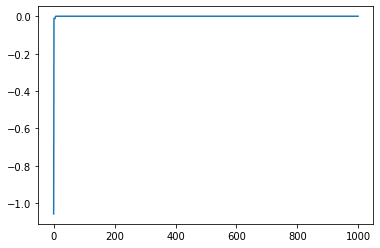

In [11]:
plot(list(range(len(convergence_curve))), convergence_curve)